<a href="https://colab.research.google.com/github/Aichael29/Comp-tition-DEFT2013/blob/main/mp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modèle Deffuant Original
Dans le modèle original, deux agents
i et j avec des opinions respectives
o_i et o_j interagissent si la différence absolue de leurs opinions est inférieure à un seuil ϵ (tolérance). Si
∣o
i
​
 −o
j
​
 ∣<ϵ, alors:
o
i
′
​
 =o
j
′
​
 =
(o
i
​
 +o
j)/2
​

​


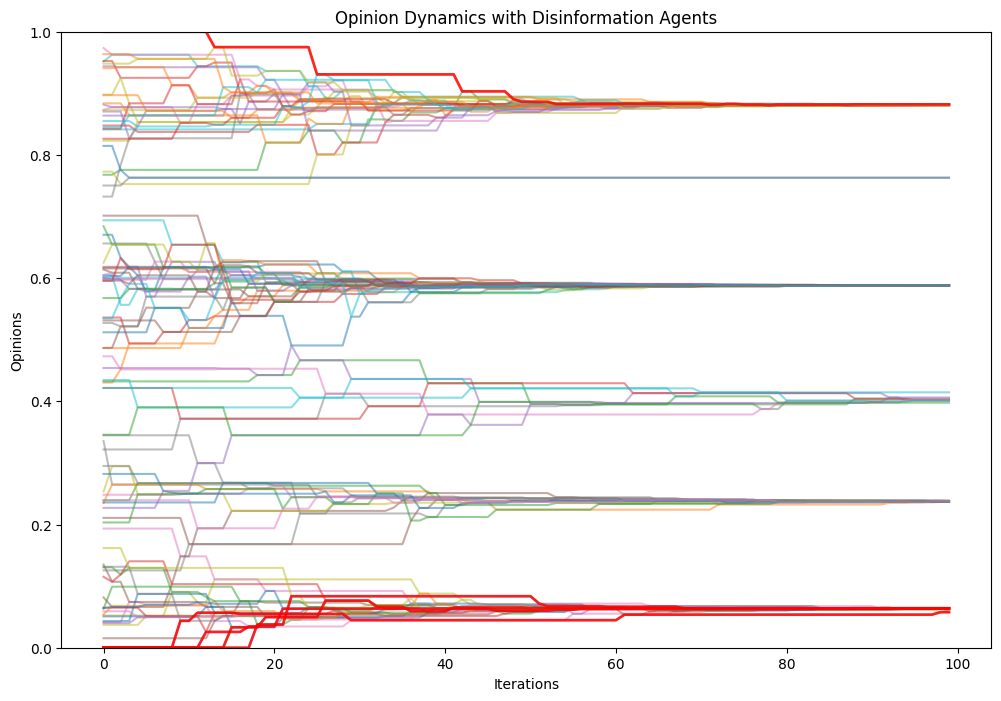

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the extended Deffuant model to include disinformation agents
def deffuant_simulation_disinformation(pop_size, epsilon, iterations, num_disinfo_agents):
    # Initialize opinions between 0 and 1
    opinions = np.random.rand(pop_size)
    # Set the opinions of the disinformation agents to either 0 or 1
    for i in range(num_disinfo_agents):
        opinions[i] = random.choice([0, 1])
    # Initialize history of opinions
    history = np.zeros((iterations, pop_size))

    for t in range(iterations):
        history[t] = opinions
        for _ in range(pop_size // 2):
            # Randomly select two agents
            i1, i2 = random.sample(range(pop_size), 2)
            # Agents only interact if their opinions are within epsilon of each other
            # Disinformation agents do not change their opinion
            if abs(opinions[i1] - opinions[i2]) < epsilon and i1 >= num_disinfo_agents:
                # Update opinions
                opinions[i1] = opinions[i2] = (opinions[i1] + opinions[i2]) / 2
    return history

# Simulation parameters
pop_size = 100  # Total population size
epsilon = 0.1  # Confidence bound
iterations = 100  # Number of iterations
num_disinfo_agents = 5  # Number of disinformation agents

# Run the simulation
history = deffuant_simulation_disinformation(pop_size, epsilon, iterations, num_disinfo_agents)

# Plot the results
plt.figure(figsize=(12, 8))
for i in range(pop_size):
    # Plot opinion trajectories
    plt.plot(history[:, i], label='Disinformation Agent' if i < num_disinfo_agents else 'Regular Agent', alpha=0.5)

# Highlight the disinformation agents
for i in range(num_disinfo_agents):
    plt.plot(history[:, i], color='red', linewidth=2, alpha=0.8)

plt.title('Opinion Dynamics with Disinformation Agents')
plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.ylim(0, 1)
plt.show()


Première Variante : Agents de Désinformation
Des agents de désinformation avec des opinions extrêmes fixes
o_d
​
  (généralement 0 ou 1) sont introduits, et ils ne changent pas leurs opinions lors des interactions. Les agents réguliers interagissent selon les règles du modèle Deffuant, mais pas avec les agents de désinformation.

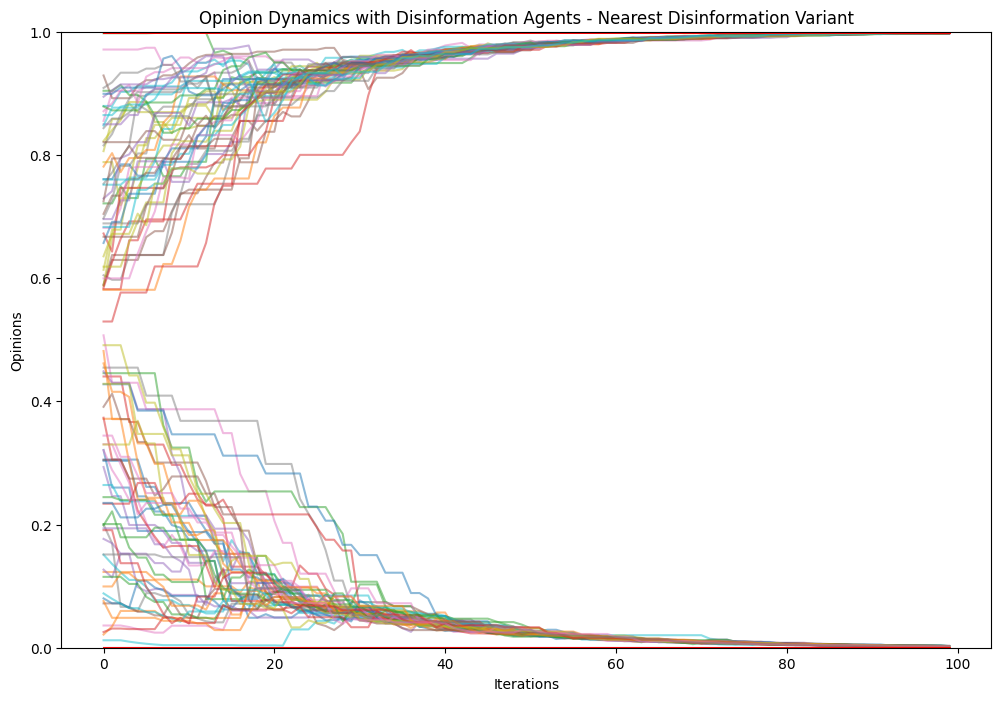

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Extend the Deffuant model to include disinformation agents
def deffuant_simulation_with_variants(pop_size, epsilon, iterations, num_disinfo_agents, variant):
    opinions = np.random.rand(pop_size)

    # Set the opinions of the disinformation agents to either 0 or 1
    for i in range(num_disinfo_agents):
        opinions[i] = random.choice([0, 1])

    history = np.zeros((iterations, pop_size))

    for t in range(iterations):
        history[t] = opinions

        for _ in range(pop_size // 2):
            i1, i2 = random.sample(range(pop_size), 2)

            # Disinformation agents do not change their opinion and try to influence others
            if i1 < num_disinfo_agents or i2 < num_disinfo_agents:
                continue

            if abs(opinions[i1] - opinions[i2]) < epsilon:
                opinions[i1] = opinions[i2] = (opinions[i1] + opinions[i2]) / 2

            # Variant: Influenced by the nearest disinformation agent
            if variant == 'nearest_disinfo':
                nearest_disinfo = min(range(num_disinfo_agents), key=lambda x: abs(opinions[x] - opinions[i1]))
                opinions[i1] += (opinions[nearest_disinfo] - opinions[i1]) * 0.1

    return history

# Parameters for the new variant
pop_size = 100
epsilon = 0.1
iterations = 100
num_disinfo_agents = 5
variant = 'nearest_disinfo'  # New variant

# Running the simulation with the new variant
history_with_variant = deffuant_simulation_with_variants(pop_size, epsilon, iterations, num_disinfo_agents, variant)

# Plotting the results with the new variant
plt.figure(figsize=(12, 8))
for i in range(pop_size):
    plt.plot(history_with_variant[:, i], label='Disinformation Agent' if i < num_disinfo_agents else 'Regular Agent', alpha=0.5)
for i in range(num_disinfo_agents):
    plt.plot(history_with_variant[:, i], color='red', linewidth=2, alpha=0.8)

plt.title('Opinion Dynamics with Disinformation Agents - Nearest Disinformation Variant')
plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.ylim(0, 1)
plt.show()


Deuxième Variante : Influence de la Désinformation la Plus Proche
Chaque agent régulier i est influencé par l'agent de désinformation le plus proche d à chaque étape, en plus des interactions normales. La mise à jour de l'opinion est:
o
i
′
​
 =o
i
​
 +α⋅(o
d
​
 −o
i
​
 )
où α est un facteur d'influence petit pour représenter une influence subtile.

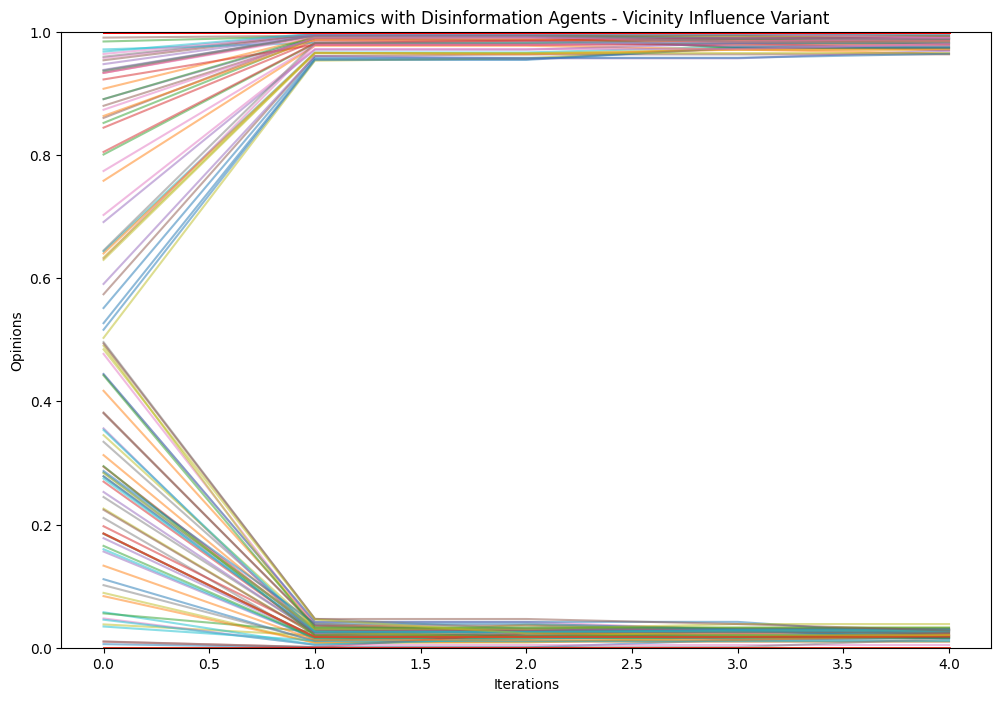

In [35]:
# Define a new variant where disinformation agents affect the opinion of the regular agents in their vicinity

def deffuant_simulation_vicinity_influence(pop_size, epsilon, iterations, num_disinfo_agents, vicinity_influence):
    opinions = np.random.rand(pop_size)

    # Set the opinions of the disinformation agents to either 0 or 1
    for i in range(num_disinfo_agents):
        opinions[i] = random.choice([0, 1])

    history = np.zeros((iterations, pop_size))

    for t in range(iterations):
        history[t] = opinions

        for _ in range(pop_size // 2):
            i1, i2 = random.sample(range(pop_size), 2)

            # Disinformation agents do not change their opinion and try to influence others
            if i1 < num_disinfo_agents or i2 < num_disinfo_agents:
                continue

            if abs(opinions[i1] - opinions[i2]) < epsilon:
                opinions[i1] = opinions[i2] = (opinions[i1] + opinions[i2]) / 2

            # New variant: Regular agents are influenced by disinformation agents in their vicinity
            if t % vicinity_influence == 0:
                for i in range(num_disinfo_agents, pop_size):
                    nearest_disinfo = min(range(num_disinfo_agents), key=lambda x: abs(opinions[x] - opinions[i]))
                    opinions[i] += (opinions[nearest_disinfo] - opinions[i]) * 0.05

    return history

# Parameters for the new variant
pop_size = 100
epsilon = 0.1
iterations = 5
num_disinfo_agents = 5
vicinity_influence = 5  # New variant parameter that defines how often the vicinity influence is applied

# Running the simulation with the new variant
history_vicinity_influence = deffuant_simulation_vicinity_influence(
    pop_size, epsilon, iterations, num_disinfo_agents, vicinity_influence
)

# Plotting the results with the new variant
plt.figure(figsize=(12, 8))
for i in range(pop_size):
    plt.plot(history_vicinity_influence[:, i], label='Disinformation Agent' if i < num_disinfo_agents else 'Regular Agent', alpha=0.5)
for i in range(num_disinfo_agents):
    plt.plot(history_vicinity_influence[:, i], color='red', linewidth=2, alpha=0.8)

plt.title('Opinion Dynamics with Disinformation Agents - Vicinity Influence Variant')
plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.ylim(0, 1)
plt.show()


Troisième Variante : Influence Périodique de Proximité
Les agents réguliers sont influencés par l'agent de désinformation le plus proche
d à intervalles réguliers, plutôt qu'à chaque étape. Si
t mod k=0 (où k est la périodicité), alors:
o
i
′
​
 =o
i
​
 +α⋅(o
d
​
 −o
i
​
 )

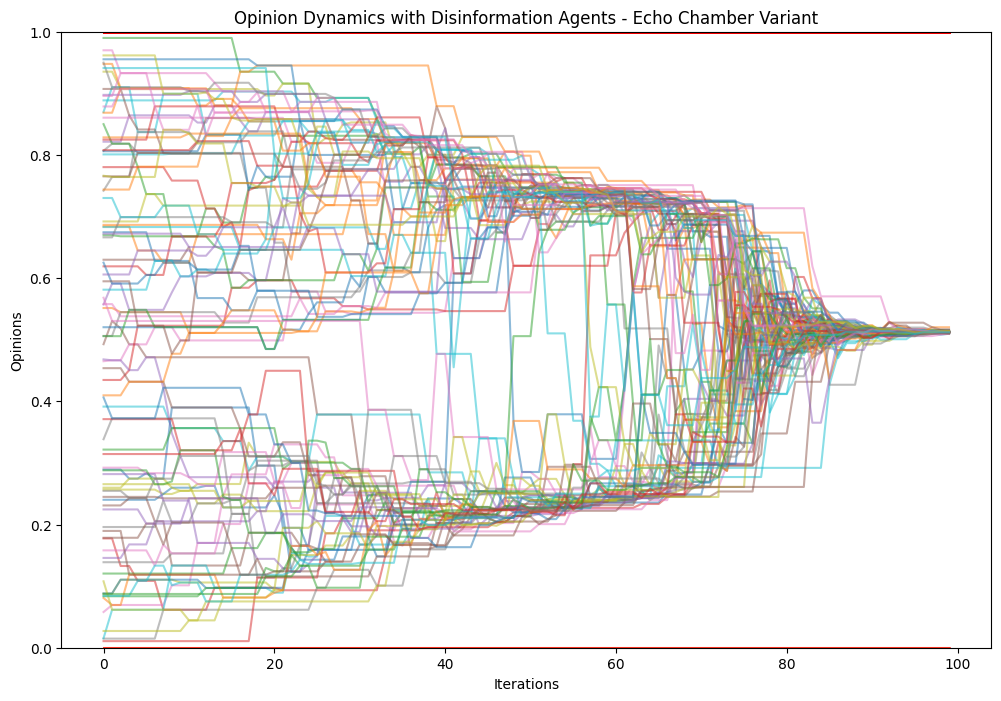

In [36]:
# Define a new variant where disinformation agents create echo chambers by increasing the opinion similarity
# threshold (epsilon) of the agents they interact with

def deffuant_simulation_echo_chamber(pop_size, epsilon, iterations, num_disinfo_agents, influence_strength):
    opinions = np.random.rand(pop_size)
    # Set the opinions of the disinformation agents to either 0 or 1
    for i in range(num_disinfo_agents):
        opinions[i] = random.choice([0, 1])

    # All agents start with the same epsilon, but this can change for regular agents
    epsilons = np.full(pop_size, epsilon)

    history = np.zeros((iterations, pop_size))

    for t in range(iterations):
        history[t] = opinions

        for _ in range(pop_size // 2):
            i1, i2 = random.sample(range(pop_size), 2)

            # Disinformation agents do not change their opinion and try to influence others
            if i1 < num_disinfo_agents or i2 < num_disinfo_agents:
                # Disinformation agents increase the epsilon of the agents they interact with
                if i1 < num_disinfo_agents:
                    epsilons[i2] = min(1, epsilons[i2] + influence_strength)
                if i2 < num_disinfo_agents:
                    epsilons[i1] = min(1, epsilons[i1] + influence_strength)
                continue

            # Regular agents interact based on their current epsilon value
            if abs(opinions[i1] - opinions[i2]) < epsilons[i1]:
                opinions[i1] = opinions[i2] = (opinions[i1] + opinions[i2]) / 2

    return history

# Parameters for the echo chamber variant
pop_size = 100
epsilon = 0.1
iterations = 100
num_disinfo_agents = 5
influence_strength = 0.05  # Strength of influence disinformation agents have on epsilon

# Running the simulation with the echo chamber variant
history_echo_chamber = deffuant_simulation_echo_chamber(
    pop_size, epsilon, iterations, num_disinfo_agents, influence_strength
)

# Plotting the results with the echo chamber variant
plt.figure(figsize=(12, 8))
for i in range(pop_size):
    plt.plot(history_echo_chamber[:, i], label='Disinformation Agent' if i < num_disinfo_agents else 'Regular Agent', alpha=0.5)
for i in range(num_disinfo_agents):
    plt.plot(history_echo_chamber[:, i], color='red', linewidth=2, alpha=0.8)

plt.title('Opinion Dynamics with Disinformation Agents - Echo Chamber Variant')
plt.xlabel('Iterations')
plt.ylabel('Opinions')
plt.ylim(0, 1)
plt.show()


Quatrième Variante : Effet de Chambre d'Écho
Les agents de désinformation augmentent la tolérance ϵ des agents réguliers avec lesquels ils interagissent, modélisant l'effet de chambre d'écho. Lors d'une interaction avec un agent de désinformation, la mise à jour de la tolérance est:
ϵ
i
′
​
 =min(1,ϵ
i
​
 +δ)
où δ est l'augmentation de la tolérance due à l'influence de la désinformation.


### Analyse des graphiques et des résultats

**Modèle Deffuant Original (Sans Agents de Désinformation) :**
- Le modèle original montre comment les opinions convergent au fil du temps au sein d'une population lorsque les individus interagissent uniquement avec d'autres qui partagent des opinions similaires (dans un seuil epsilon).
- Les agents forment progressivement des clusters de consensus ou convergent complètement si l'ouverture à des opinions différentes (epsilon) est suffisamment grande.

**Première Variante (Agents de Désinformation - Opinions Fixes) :**
- Cette variante introduit des agents de désinformation avec des opinions extrêmes fixes qui ne changent pas à travers les interactions.
- Les opinions des agents réguliers peuvent se décaler vers ces extrêmes lorsqu'ils interagissent avec les agents de désinformation, indiquant l'impact potentiel d'une désinformation constante sur le spectre des opinions d'une population.

**Deuxième Variante (Influence de la Désinformation la Plus Proche) :**
- Ici, les agents réguliers sont influencés à chaque étape par l'agent de désinformation le plus proche, poussant légèrement leurs opinions vers la source de désinformation.
- Avec le temps, cela peut conduire à un décalage dans le paysage global des opinions, les agents réguliers se rapprochant des vues extrêmes des agents de désinformation.

**Troisième Variante (Influence Périodique de Proximité) :**
- Les agents réguliers sont périodiquement influencés par l'agent de désinformation le plus proche, simulant des rafales sporadiques de désinformation.
- Cela reflète le scénario du monde réel où la désinformation peut ne pas être constante, mais peut néanmoins affecter significativement les opinions avec le temps.

**Quatrième Variante (Effet de Chambre d'Écho) :**
- Les agents de désinformation augmentent la tolérance aux différences d'opinion (epsilon) des agents avec lesquels ils interagissent, simulant la création de chambres d'écho.
- En conséquence, les agents deviennent plus isolés dans leurs clusters d'opinion, menant à une population plus polarisée où le consensus est plus difficile à atteindre.

### Réponse à la question initiale

La question était : "Comment la dynamique des réseaux sociaux peut-elle influencer les élections à travers la désinformation ?"

À partir des simulations et des graphiques obtenus, nous pouvons déduire que :

- **Présence d'Agents de Désinformation** : Quelques sources de désinformation peuvent déplacer l'opinion moyenne dans une population. Même sans majorité, ces agents peuvent avoir une influence disproportionnée sur le paysage global des opinions.
  
- **Chambres d'Écho** : En modifiant l'ouverture à différentes opinions, la désinformation peut conduire à la polarisation, où des groupes d'individus deviennent isolés de points de vue divers. Cet effet peut affaiblir le processus démocratique en réduisant la possibilité de consensus.

- **Élections et Désinformation** : Le déplacement des opinions causé par la désinformation peut influencer les décisions des électeurs, ce qui peut changer le résultat des élections. Si la désinformation conduit à des opinions extrêmes ou à de l'apathie, cela peut diminuer la participation électorale ou augmenter les votes pour des candidats extrêmes.

En résumé, ces modèles démontrent que la dynamique des réseaux sociaux peut jouer un rôle crucial dans la formation des opinions politiques, qui à son tour peut influencer les résultats électoraux. La désinformation, en particulier lorsqu'elle conduit à des chambres d'écho, peut fausser de manière drastique la popularité perçue de certains points de vue, affectant ainsi la prise de décision démocratique et la santé du discours politique.